## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Fungsi untuk menampilkan citra

In [2]:
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Membaca gambar menggunakan OpenCV

In [3]:
img = cv2.imread("jeruk.jpg")

## Fungsi untuk membuat mask berdasarkan warna jeruk

In [4]:
def mask_jeruk(image):
    # Konversi citra ke HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Definisikan kisaran warna untuk buah jeruk (disesuaikan dengan warna jeruk)
    lower_orange = np.array([10, 100, 100])
    upper_orange = np.array([30, 255, 255])
    
    # Buat mask berdasarkan kisaran warna
    mask = cv2.inRange(hsv, lower_orange, upper_orange)
    
    # Morfologi untuk memperbaiki mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask


## Fungsi untuk segmentasi buah jeruk

In [5]:
def segment_jeruk(img, mask):
    # Menggunakan mask untuk mengekstrak buah jeruk
    segmented = cv2.bitwise_and(img, img, mask=mask)
    return segmented

## Fungsi untuk segmentasi daun dengan deteksi tepi

In [6]:
def segment_daun(img):
    # Konversi citra ke HSV untuk segmentasi daun
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Definisikan kisaran warna hijau untuk daun
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([90, 255, 255])
    
    # Buat mask untuk hijau
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Morfologi untuk memperbaiki mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Deteksi tepi pada daun yang telah disegmentasi
    edges = cv2.Canny(mask, 100, 200)
    
    # Menggabungkan tepi dengan hasil segmentasi daun
    daun_segmented = cv2.bitwise_and(img, img, mask=mask)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    daun_segmented_edges = cv2.addWeighted(daun_segmented, 0.8, edges_colored, 0.2, 0)
    
    return daun_segmented, daun_segmented_edges

## Menampilkan Hasil

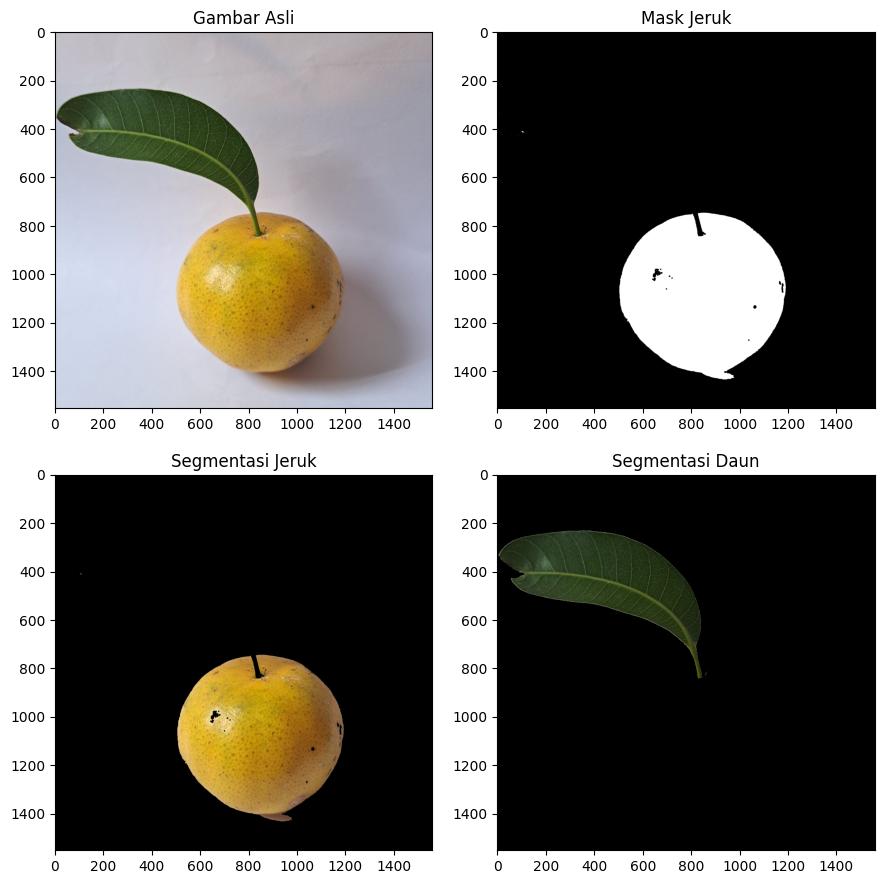

In [7]:
# Membuat mask buah jeruk
jeruk_mask = mask_jeruk(img)

# Melakukan segmentasi buah jeruk
segmented_jeruk = segment_jeruk(img, jeruk_mask)

# Melakukan segmentasi daun dengan deteksi tepi
daun_segmented, daun_segmented_edges = segment_daun(img)

# Menampilkan gambar dalam tata letak
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

# Menyembunyikan sumbu (axis) pada gambar
for ax in axs.ravel():
    ax.axis('on')

# Menampilkan gambar-gambar
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gambar Asli')

axs[0, 1].imshow(cv2.cvtColor(jeruk_mask, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Mask Jeruk')

axs[1, 0].imshow(cv2.cvtColor(segmented_jeruk, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Segmentasi Jeruk')

axs[1, 1].imshow(cv2.cvtColor(daun_segmented_edges, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Segmentasi Daun')

plt.tight_layout()
plt.show()